<a href="https://colab.research.google.com/github/shivamsouravjha/TF-Droid/blob/master/sign_language_digits_dataset_with_99_61_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivamsouravjha","key":"8bb02df3eb97f8e021019f5a3a3323bf"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           1289  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05            701  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2878  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          63MB  2020-09-02 13:46:38            398  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification       

In [6]:
!kaggle datasets download -d ardamavi/sign-language-digits-dataset

 54% 9.00M/16.8M [00:01<00:01, 7.42MB/s]
100% 16.8M/16.8M [00:01<00:00, 11.6MB/s]


In [7]:
! mkdir train
!ls
! unzip sign-language-digits-dataset.zip -d train

kaggle.json  sample_data  sign-language-digits-dataset.zip  train
Archive:  sign-language-digits-dataset.zip
  inflating: train/Sign-language-digits-dataset/X.npy  
  inflating: train/Sign-language-digits-dataset/Y.npy  
  inflating: train/X.npy             
  inflating: train/Y.npy             


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from tensorflow import keras
import cv2
from keras.models import load_model
import math
import numpy as np
import pathlib
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam
from keras.applications import xception
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Lets load the data

In [9]:
x_l = np.load('/content/train/X.npy')    #loading X 
Y_l = np.load('/content/train/Y.npy')   #loading y

Display the image loaded 

(-0.5, 63.5, 63.5, -0.5)

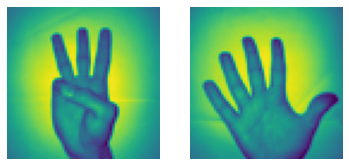

In [10]:
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_l[700].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[1900].reshape(img_size,img_size))
plt.axis('off')


Resizing the image so that can be fit in 64,64

In [11]:
X=x_l
Y=Y_l
X = X.reshape(-1,64,64,1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (2062, 64, 64, 1)
Y shape:  (2062, 10)


Splitting the train and test data with 25% ratio


In [12]:
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

In [13]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (1546, 64, 64, 1)
x_test shape (516, 64, 64, 1)
y_train shape (1546, 10)
y_test shape (516, 10)


Making the model

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation= 'relu',input_shape=(64,64,1)))          #adding convolution
model.add(BatchNormalization())                     #normalising the batch
model.add(MaxPool2D(pool_size=(2,2)))                            #max pooling 
model.add(Dropout(0.2))                                    #dropping ou t20%
model.add(Conv2D(64,(3,3),padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())                  #flatten the outpt by above layers
model.add(Dense(256,activation= 'relu'))                 #dense layer 1
model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))

model.add(Dense(10,activation= 'softmax'))                 #outputting from dense layer on 10 selections


Summary of the model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

Compiling with Adam

In [16]:
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
# Compile the model
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics=["accuracy"])
# fitting


The image of the model

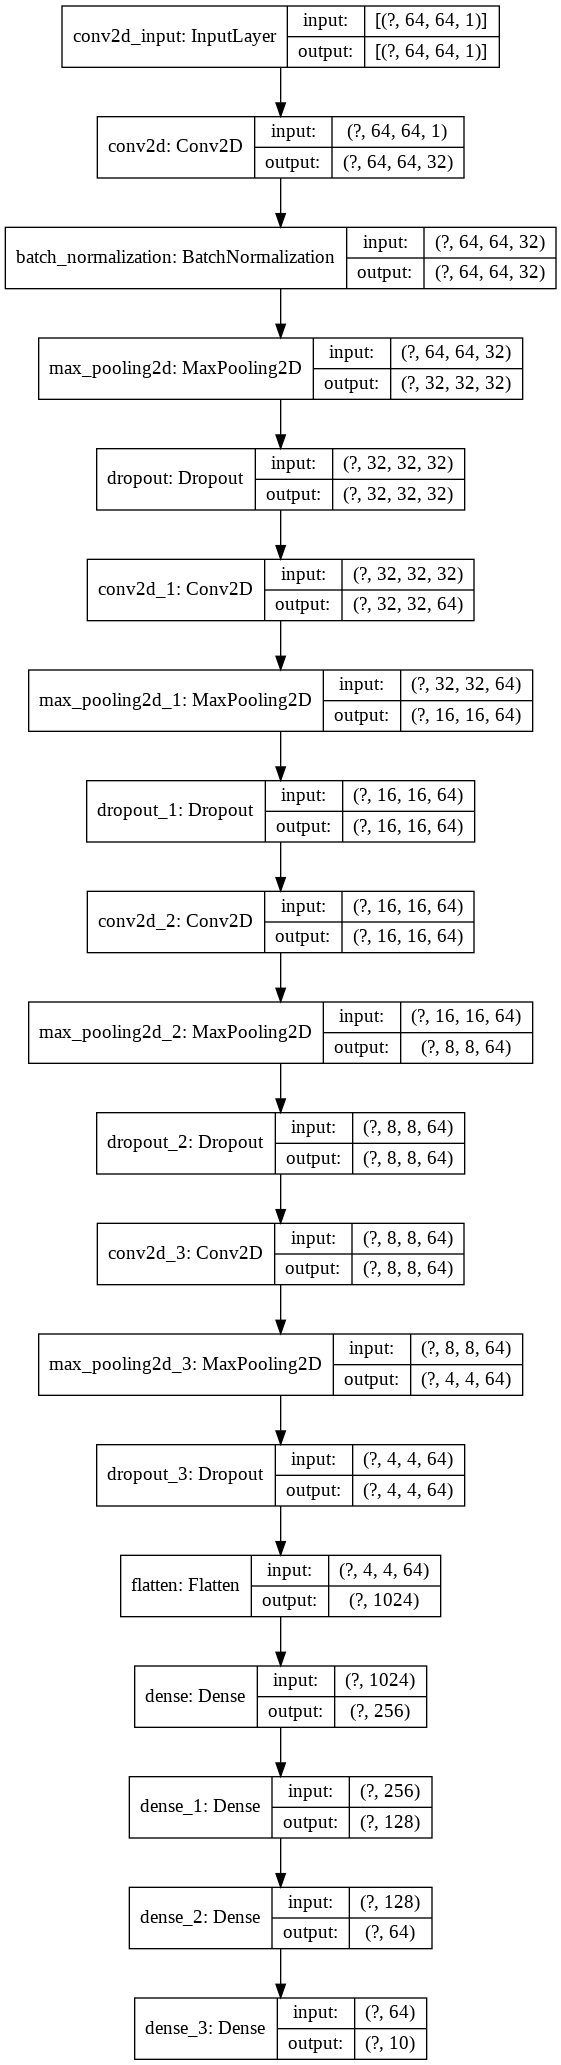

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

Callback function to stop upon reaching the %99.4 accuracy 

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.994):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True

using the callback and fitting it on data and run the model

In [19]:
callbacks = myCallback()

history = model.fit(X_train,Y_train,epochs=225,validation_data=(X_test,Y_test),callbacks = [callbacks])

Epoch 1/225
49/49 [==============================] - 1s 26ms/step - loss: 2.3448 - accuracy: 0.1035 - val_loss: 2.3022 - val_accuracy: 0.1318
Epoch 2/225
49/49 [==============================] - 1s 17ms/step - loss: 2.1404 - accuracy: 0.2031 - val_loss: 2.2903 - val_accuracy: 0.1628
Epoch 3/225
49/49 [==============================] - 1s 17ms/step - loss: 1.3486 - accuracy: 0.5013 - val_loss: 2.2243 - val_accuracy: 0.1686
Epoch 4/225
49/49 [==============================] - 1s 17ms/step - loss: 0.8800 - accuracy: 0.6960 - val_loss: 2.1821 - val_accuracy: 0.6008
Epoch 5/225
49/49 [==============================] - 1s 16ms/step - loss: 0.6171 - accuracy: 0.7814 - val_loss: 2.0833 - val_accuracy: 0.6686
Epoch 6/225
49/49 [==============================] - 1s 16ms/step - loss: 0.4814 - accuracy: 0.8325 - val_loss: 1.8954 - val_accuracy: 0.7209
Epoch 7/225
49/49 [==============================] - 1s 17ms/step - loss: 0.3854 - accuracy: 0.8732 - val_loss: 1.4219 - val_accuracy: 0.9360
Epoch 

Evaluate the model from test set 

Loading the image for testing a single pics

load the model saved earlier and run the model to find the number

The ouput of the image 

In [21]:
export_dir = 'tmp/saved_model'
tf.saved_model.save(model,export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
tflite_model_file= pathlib.Path('/tmp/foo.tflite')
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)
tflite_model_file.write_bytes(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: tmp/saved_model/assets


409856

In [ ]:
files.download(tflite_model_file)
